### Loading Datasets using Pandas

In [1]:
import pandas as pd

In [4]:
## You can give relative path or abosolute path
titanic_df = pd.read_csv( "./data/titanic.csv" )

In [ ]:
#titanic_df = pd.read_csv( "C:\\dir1\\dir2\\data\\titanic.csv" ) ## Give full path

In [5]:
type( titanic_df )

pandas.core.frame.DataFrame

- DataFrame is like an in-memory sql table.
- Rows are indexed and column are named. Column names are taken from the first record in the data file.

In [7]:
## Print first 5 records
titanic_df.head(5)

row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
4  Montreal, PQ / Chesterville, ON  C22         NaN     11    male

In [8]:
## Dimension of the dataframe
titanic_df.shape

(1313, 11)

In [9]:
### Detailed Metadata
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 112.9+ KB


## Indexing and Slicing

In [12]:
### First 3 records

titanic_df[0:3] # begin index : end index (until)

#titanic_df[:3]

row.names pclass  survived                                 name   age  \
0          1    1st         1         Allen, Miss Elisabeth Walton  29.0   
1          2    1st         0          Allison, Miss Helen Loraine   2.0   
2          3    1st         0  Allison, Mr Hudson Joshua Creighton  30.0   

      embarked                        home.dest room      ticket   boat  \
0  Southampton                     St Louis, MO  B-5  24160 L221      2   
1  Southampton  Montreal, PQ / Chesterville, ON  C26         NaN    NaN   
2  Southampton  Montreal, PQ / Chesterville, ON  C26         NaN  (135)   

      sex  
0  female  
1  female  
2    male

In [11]:
### Last 3 records

titanic_df[-3:]

row.names pclass  survived             name  age embarked home.dest  \
1310       1311    3rd         0  Zenn, Mr Philip  NaN      NaN       NaN   
1311       1312    3rd         0    Zievens, Rene  NaN      NaN       NaN   
1312       1313    3rd         0   Zimmerman, Leo  NaN      NaN       NaN   

     room ticket boat     sex  
1310  NaN    NaN  NaN    male  
1311  NaN    NaN  NaN  female  
1312  NaN    NaN  NaN    male

In [13]:
## first 3 records and column called "name"

titanic_df[0:3]['name']

0           Allen, Miss Elisabeth Walton
1            Allison, Miss Helen Loraine
2    Allison, Mr Hudson Joshua Creighton
Name: name, dtype: object

In [14]:
### first 3 records and two columns 'name' and 'age'

cols = ['name', 'age']
titanic_df[0:3][cols]

name   age
0         Allen, Miss Elisabeth Walton  29.0
1          Allison, Miss Helen Loraine   2.0
2  Allison, Mr Hudson Joshua Creighton  30.0

In [15]:
titanic_df[0:3][['name', 'age']] ## typically used

name   age
0         Allen, Miss Elisabeth Walton  29.0
1          Allison, Miss Helen Loraine   2.0
2  Allison, Mr Hudson Joshua Creighton  30.0

## Aggregations

### How may passengers survived?

In [16]:
## titanic_df['survived']
titanic_df.survived.value_counts() ### Occurances of each unique value in the column

0    864
1    449
Name: survived, dtype: int64

In [18]:
titanic_df.survived.value_counts( normalize = True ) * 100

0    65.803503
1    34.196497
Name: survived, dtype: float64

### Question 1:

How many male and females were on board?

### What is proportion of male and female who survived vs not survived.

In [21]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             margins = True )

survived    0    1   All
sex                     
female    156  307   463
male      708  142   850
All       864  449  1313

In percentages:

1. Of all female what percentage survived and what perc did not survive? 
2. Of all those who survived, what percetage were male and what perc were female?

In [22]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             normalize = "index" )

survived         0         1
sex                         
female    0.336933  0.663067
male      0.832941  0.167059

In [23]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             normalize = "columns" )

survived         0         1
sex                         
female    0.180556  0.683742
male      0.819444  0.316258

### Question 2:

Was there any bias towards passanger class as far as survival is concerned?

### Passenger of what age or age group were mostly onboard the ship?

In [25]:
#titanic_df.age.value_counts()

### Variable Types

Two variable types
- Numerical : quantify 
   - e.g. age, salary, sales
   - Two types
       - Continuous
       - Discrete : Specific values
           - e.g. Number of dependents
           - e.g. number of cars you own
- Categorical : 
    - e.g Sex/gender, survived vs. not survived, weedays

### Histogram

For depicting the numerical variables (continuous)

In [27]:
import matplotlib.pyplot as plt

(array([ 35.,  24., 107., 138., 105.,  79.,  66.,  40.,  25.,  14.]),
 array([ 0.1667 ,  7.25003, 14.33336, 21.41669, 28.50002, 35.58335,
        42.66668, 49.75001, 56.83334, 63.91667, 71.     ]),
 <a list of 10 Patch objects>)

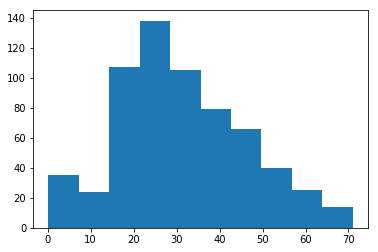

In [28]:
plt.hist( titanic_df.age.dropna() )

In [29]:
titanic_df.age.min()

0.1667

In [30]:
titanic_df.age.max()

71.0

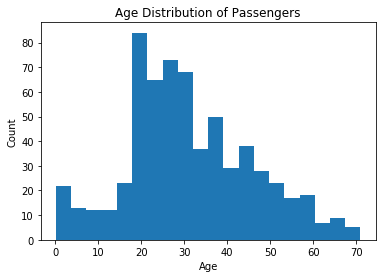

In [34]:
plt.hist( titanic_df.age.dropna(), bins = 20 );
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers");
plt.savefig("age.png")

In [38]:
import seaborn as sn

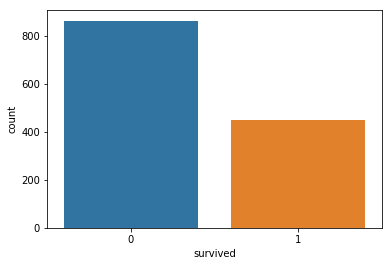

In [39]:
sn.countplot( data = titanic_df,
              x = 'survived' );

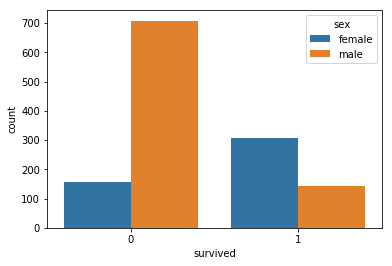

In [40]:
sn.countplot( data = titanic_df,
              x = 'survived',
              hue = 'sex' );

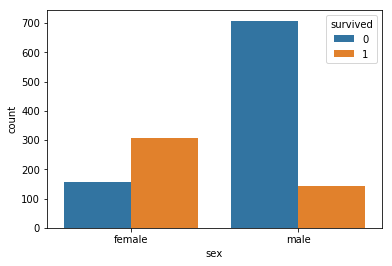

In [41]:
sn.countplot( data = titanic_df,
              hue = 'survived',
              x = 'sex' );
plt.savefig("survived.png")

### Question 3:

Plot (Count Plot) how many male and females were there in each passenger class?

### Filtering 

#### How many children were on board and how many survived?

<= 5 years

In [42]:
children_df = titanic_df[titanic_df.age <= 5]

In [43]:
children_df.shape

(29, 11)

In [44]:
children_df.survived.value_counts()

1    24
0     5
Name: survived, dtype: int64

#### How many girl child who were less than 5 years old?

In [45]:
children_df = titanic_df[(titanic_df.age <= 5) & 
                         (titanic_df.sex == 'female')]

In [46]:
children_df.shape

(11, 11)

In [48]:
children_df.survived.value_counts()

1    9
0    2
Name: survived, dtype: int64

### Aggregations (GroupBy)

#### What is the average age of each passenger class?

In [49]:
age_df = titanic_df.groupby("pclass")['age'].mean()

In [50]:
age_df

pclass
1st    39.667773
2nd    28.300314
3rd    24.519658
Name: age, dtype: float64

In [51]:
type(age_df)

pandas.core.series.Series

In [55]:
### Converting into dataframes
age_df = age_df.reset_index()

In [53]:
type(age_df)

pandas.core.frame.DataFrame

In [54]:
age_df

pclass        age
0    1st  39.667773
1    2nd  28.300314
2    3rd  24.519658

In [56]:
age_df.to_csv( "age.csv" )

In [58]:
### Writing without index
age_df.to_csv( "age.csv", index = False )